In [3]:
import cv2
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import fabio

In [4]:
def convert_cbf_to_tiff(cbf_path):
    """
    Converts a CBF file to TIFF format and returns the TIFF filename.
    """
    tiff_path = cbf_path.replace(".cbf", ".tiff")
    cbf_image = fabio.open(cbf_path)

    # Convert to uint16 (with normalization)
    tiff.imwrite(tiff_path, cbf_image.data.astype('uint16'))
    
    return tiff_path

    # Display the image
    # plt.imshow(tiff_image, cmap="gray")
    # plt.colorbar()  # Show intensity scale
    # plt.axis("off")  # Hide axes
    # plt.show()

# # Example usage
# convert_and_display_cbf("da_7_c_gst_sio2.cbf")

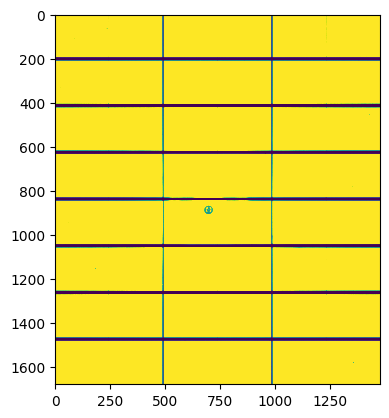

In [5]:
file_path = 'da_7_c_gst_sio2.cbf'
# Open the .cbf file using fabio
image = fabio.open(file_path)
# Access the image data as a NumPy array
data = image.data
import matplotlib.pyplot as plt
plt.imshow(data, vmin=0, vmax=10000000)


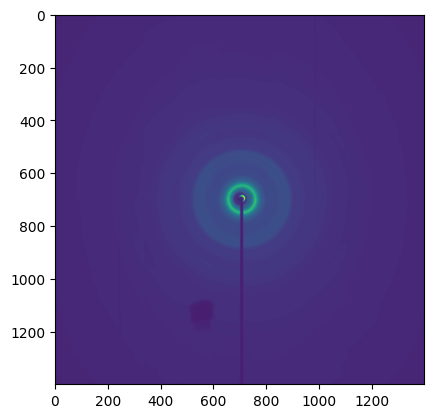

In [6]:
image1 = tiff.imread("avg_image_3_DyIG_60k_fusedSi_1400.tiff")
plt.imshow(image1)

In [24]:
def process_cbf_data(cbf_file):
    """
    Processes raw data from a CBF file: crops to 1400x1400 centered around detected circles.
    Returns the cropped NumPy array.
    """
    print("Processing CBF file...")

    # Load the CBF image
    image = fabio.open(cbf_file)
    image_data = image.data
    plt.imshow(image_data, vmin=0, vmax=100000)

    # Determine crop size (1400x1400 or smaller if needed)
    crop_size = min(1400, image_data.shape[0], image_data.shape[1])

    # # Convert to 8-bit grayscale if needed
    # if image_data.dtype != np.uint8:
    #     gray_8bit = cv2.convertScaleAbs(image_data, alpha=(255.0 / image_data.max()))
    # else:
    #     gray_8bit = image_data.copy()

    # # Edge detection
    # edges = cv2.Canny(gray_8bit, 50, 150)

    # # Detect circles using Hough Transform
    # circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, 
    #                            param1=50, param2=30, minRadius=20, maxRadius=500)

    # if circles is not None:
    #     # Get the first detected circle
    #     x_center, y_center, _ = np.round(circles[0, 0]).astype(int)
    # else:
    #     # Default to image center if no circle is detected
    #     x_center, y_center = image_data.shape[1] // 2, image_data.shape[0] // 2
    x_center, y_center = image_data.shape[1] // 2, image_data.shape[0] // 2
    # Ensure crop is within bounds
    half_crop = crop_size // 2
    x_start = max(0, x_center - half_crop)
    y_start = max(0, y_center - half_crop)
    x_end = min(image_data.shape[1], x_center + half_crop)
    y_end = min(image_data.shape[0], y_center + half_crop)

    # Crop the image while keeping its original bit depth
    cropped_image = image_data[y_start:y_end, x_start:x_end]
    plt.imshow(cropped_image, vmin=0, vmax=100000)
    return cropped_image

In [27]:
def crop_images_1400(tiff_file):
    image = tiff.imread(tiff_file)
    crop_size = 1400

    #Ensure dimensions are over 1400
    height, width = image.shape[:2]
    if height < crop_size or width < crop_size: #Add logic so if under 1400 that becomes the new crop size?
        print("Image is too small")

    # Determine image bit depth
    bit_depth = image.dtype  # Keep track of original bit depth
    gray = image.copy()

    #Converts to grayscale if not 8 bit
    if gray.dtype != np.uint8:
        gray_8bit = cv2.convertScaleAbs(gray, alpha=(255.0 / gray.max()))
    else:
        gray_8bit = gray  # Already 8-bit

    # Apply edge detection
    edges = cv2.Canny(gray_8bit, 50, 150)

    # Detect circles using Hough Transform
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, 
                               param1=50, param2=30, minRadius=20, maxRadius=500)

    if circles is not None:
        # Get the first detected circle
        x_center, y_center, _ = np.round(circles[0, 0]).astype(int)
    else:
        # Default to image center if no circle is detected
        x_center, y_center = width // 2, height // 2

    # Ensure the crop is within bounds
    half_crop = crop_size // 2
    x_start = max(0, x_center - half_crop)
    y_start = max(0, y_center - half_crop)
    x_end = min(width, x_center + half_crop)
    y_end = min(height, y_center + half_crop)

    # Crop the image while keeping its original bit depth
    cropped_image = image[y_start:y_end, x_start:x_end]

    # Save the cropped image in the original bit depth
    output_filename = f"{tiff_file.replace('.tiff', '')}_1400.tiff"
    tiff.imwrite(output_filename, cropped_image)
    plt.imshow(cropped_image)
    plt.show()
    
    return output_filename

Processing CBF file...
CBF file processed successfully.


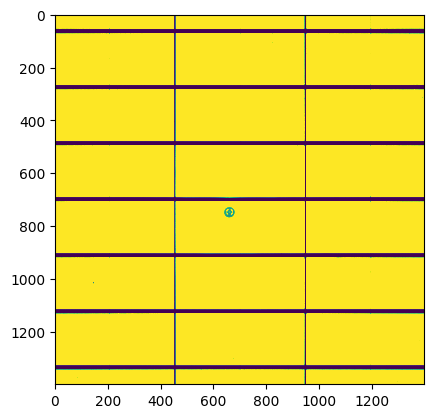

In [29]:
def file_check_and_process(input_file):
    """
    Checks the file type and processes it using the appropriate function.
    """
    if input_file.lower().endswith(('.tif', '.tiff')):
        return crop_images_1400(input_file)
    elif input_file.lower().endswith('.cbf'):
        return process_cbf_data(input_file)
    else:
        print("Unsupported file format!")
        return None

# Example usage
output_cbf = file_check_and_process("da_7_c_gst_sio2.cbf")
# output_tiff = file_check_and_process("avg_image_3_DyIG_60k_fusedSi_1400.tiff")

if output_cbf is not None:
    print("CBF file processed successfully.")
